<a href="https://colab.research.google.com/github/MahyarFardin/Deep-white-noise-elimination-using-recurrent-and-convolutional-generative-adversial-networks/blob/main/dataset_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
from matplotlib import pyplot as plt
import os
import shutil
import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf
import random

In [ ]:
#!git clone https://github.com/microsoft/MS-SNSD.git

In [ ]:
# dataset_folders = ["clean_test", "clean_train", "noise_test", "noise_train", "hitapps"]
# repo_path = "MS-SNSD"
# drive_path = "/content/drive/MyDrive/White Noise project/Dataset"

# for folder in dataset_folders:
#   source = os.path.join(repo_path, folder)
#   destination = os.path.join(drive_path, folder)
#   shutil.copytree(source, destination)
#   print(f"{folder} copied to google drive")

In [ ]:
# shutil.rmtree(repo_path)
# print("cloned repository deleted from colab's memory")

In [ ]:
clean_sample = "/content/drive/MyDrive/White Noise project/Dataset/clean_train/p234_034.wav"
noise_sample = "/content/drive/MyDrive/White Noise project/Dataset/noise_train/AirConditioner_4.wav"
save_path = "/content/drive/MyDrive/White Noise project/Dataset/dataset_overview"

signal_clean, sr = librosa.load(clean_sample, sr = 44100, duration = 4)
signal_noise, _ = librosa.load(noise_sample, sr = 44100, duration = 4)

In [ ]:
# Constants defining parameters for frame-based analysis of time-domain signals
FRAME_LENGTH = 512
HOP_LENGTH = 256

In [ ]:
ipd.Audio(clean_sample)

In [ ]:
ipd.Audio(noise_sample)

In [ ]:
print(signal_clean.shape)
print(signal_noise.shape)

(176400,)
(176400,)


In [ ]:
def plot_samples(signal_clean, signal_noise, sr):
  plt.figure(figsize = (12,7))

  #plot the sample_clean
  plt.subplot(2, 1, 1)
  librosa.display.waveshow(signal_clean, sr = sr, alpha = 0.5)
  plt.ylim((-1,1))
  plt.title("Sample without noise")
  plt.ylabel("Amplitude")


  #plot the sample_noise
  plt.subplot(2, 1, 2)
  librosa.display.waveshow(signal_noise, sr = sr, alpha = 0.5)
  plt.ylim((-1,1))
  plt.title("Sample noise")
  plt.xlabel("Time")
  plt.ylabel("Amplitude")

  #plt.savefig(os.path.join(save_path, "signals.png"))
  plt.tight_layout()
  plt.show()

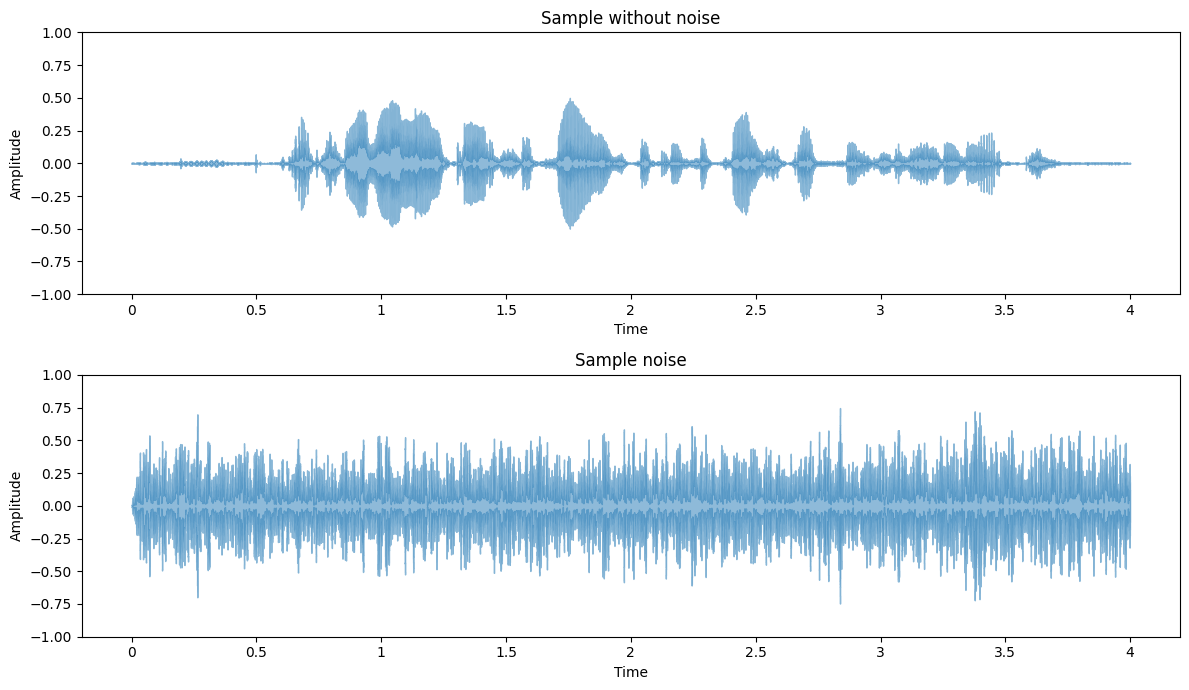

In [ ]:
plot_samples(signal_clean, signal_noise, sr)

In [ ]:
def amplitude_envelope(signal, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH):
  """
    Computes the amplitude envelope of a signal.

    Parameters:
    - signal (numpy.ndarray): The input signal.
    - frame_length (int, optional): The size of each analysis frame. Defaults to FRAME_LENGTH(1024).
    - hop_length (int, optional): The number of samples between adjacent frames. Defaults to HOP_LENGTH(512).

    Returns:
    - numpy.ndarray: An array containing the maximum amplitude value within each frame.
  """
  return np.array([max(signal[i:i+frame_length]) for i in range(0, signal.size, hop_length)])

In [ ]:
# Calculate the amplitude envelope for both clean and noise signals

ae_signal_clean = amplitude_envelope(signal_clean, FRAME_LENGTH, HOP_LENGTH)
ae_signal_noise = amplitude_envelope(signal_noise, FRAME_LENGTH, HOP_LENGTH)

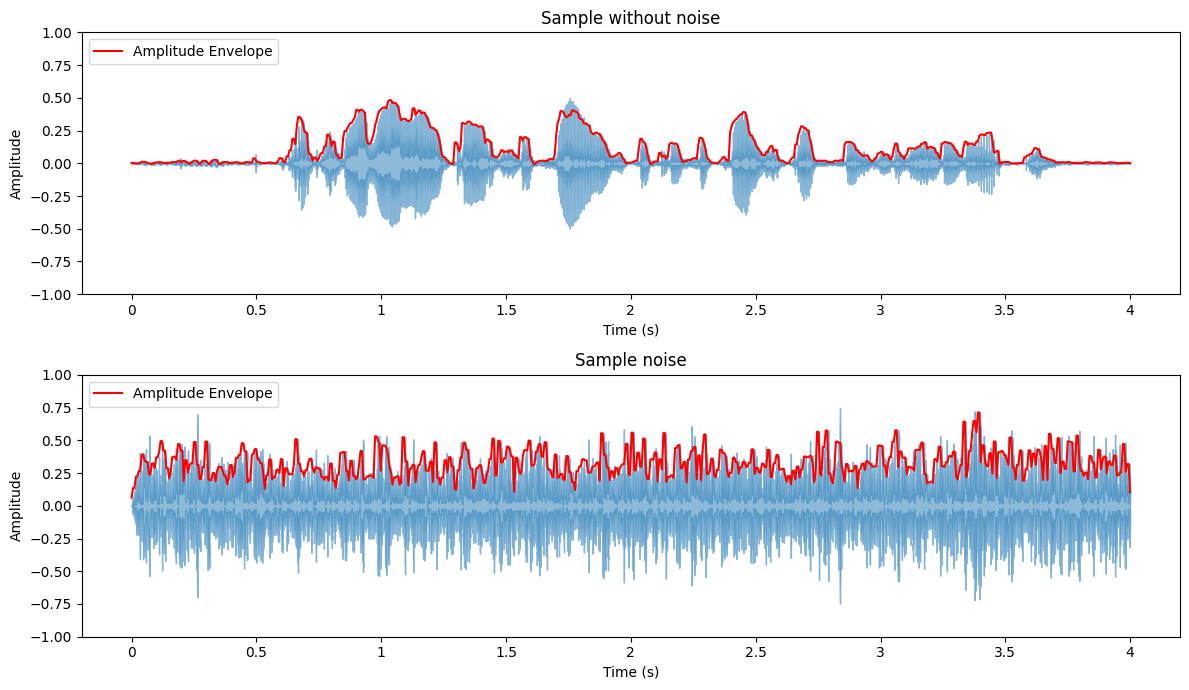

In [ ]:
# Convert frame indices to time values
frames = range(len(ae_signal_clean))
time = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)/2


# Plot the amplitude envelope for both samples, with and without noise
plt.figure(figsize = (12,7))

plt.subplot(2, 1, 1)
librosa.display.waveshow(signal_clean, sr = sr, alpha = 0.5)
plt.plot(time, ae_signal_clean, color = "r", label="Amplitude Envelope")
plt.ylim((-1 , 1))
plt.title("Sample without noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc = "upper left")

plt.subplot(2, 1, 2)
librosa.display.waveshow(signal_noise, sr = sr, alpha = 0.5)
plt.plot(time, ae_signal_noise, color = "r", label="Amplitude Envelope")
plt.ylim((-1 , 1))
plt.title("Sample noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc = "upper left")

#plt.savefig(os.path.join(save_path, "Amplitude Envelope.png"))
plt.tight_layout()
plt.show()

In [ ]:
def rms(signal, frame_length, hop_length):
  """
    Compute the root mean square (RMS) energy for each analysis frame in a signal.

    Parameters:
    - signal (numpy.ndarray): The input signal.
    - frame_length (int): The size of each analysis frame.
    - hop_length (int): The number of samples between adjacent frames.

    Returns:
    - numpy.ndarray: An array containing the RMS energy for each frame.
  """
  rms = []

  for i in range(0, len(signal), hop_length):
    rms_current_frame = np.sqrt((np.sum(signal[i:i+frame_length]**2)) / frame_length)
    rms.append(rms_current_frame)

  return np.array(rms)

In [ ]:
# Calculate the Root Mean Square (RMS) energy for both clean and noise signals

rms_signal_clean = rms(signal_clean, FRAME_LENGTH, HOP_LENGTH)
rms_signal_noise = rms(signal_noise, FRAME_LENGTH, HOP_LENGTH)

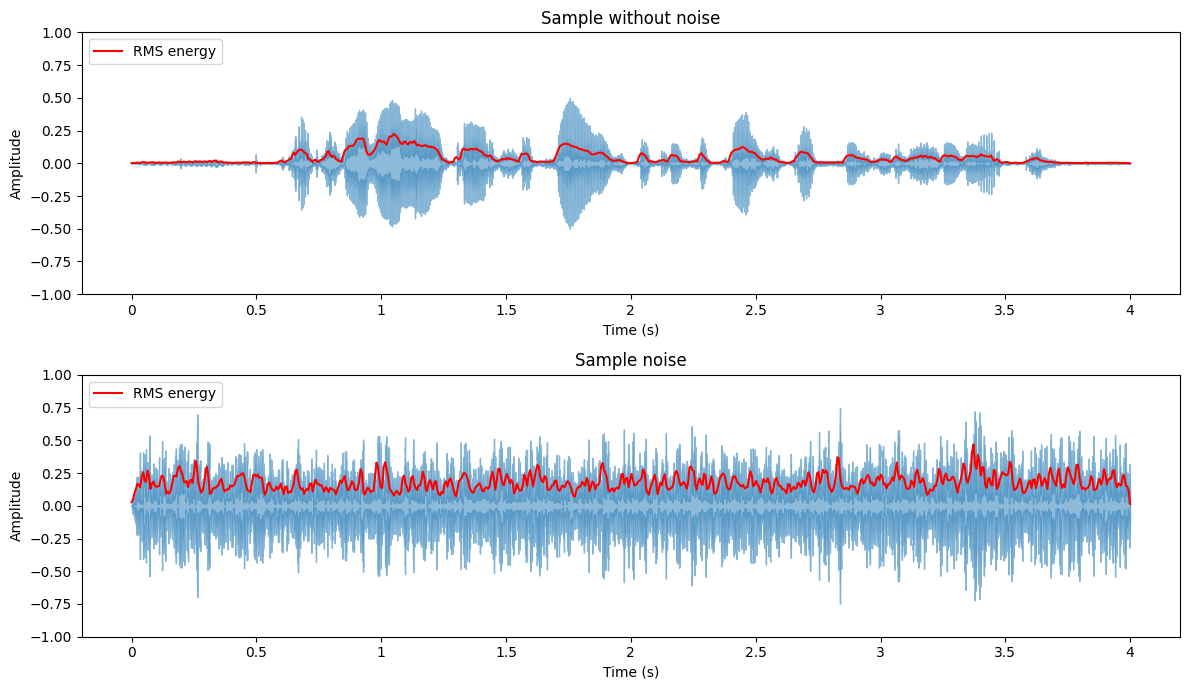

In [ ]:
# Convert frame indices to time values
frames = range(len(rms_signal_clean))
time = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)/2

# Plotting the root-mean-square energy (RMSE) for both clean and noise signals over time
plt.figure(figsize = (12,7))

plt.subplot(2, 1, 1)
librosa.display.waveshow(signal_clean, sr = sr, alpha = 0.5)
plt.plot(time, rms_signal_clean, color = "r", label="RMS energy")
plt.ylim((-1 , 1))
plt.title("Sample without noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc = "upper left")

plt.subplot(2, 1, 2)
librosa.display.waveshow(signal_noise, sr = sr, alpha = 0.5)
plt.plot(time, rms_signal_noise, color = "r", label="RMS energy")
plt.ylim((-1 , 1))
plt.title("Sample noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc = "upper left")

#plt.savefig(os.path.join(save_path, "RMS energy.png"))
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the Zero Crossing Rate (ZCR) for both clean and noise signals

zcr_signal_clean = librosa.feature.zero_crossing_rate(signal_clean, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
zcr_signal_noise = librosa.feature.zero_crossing_rate(signal_noise, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

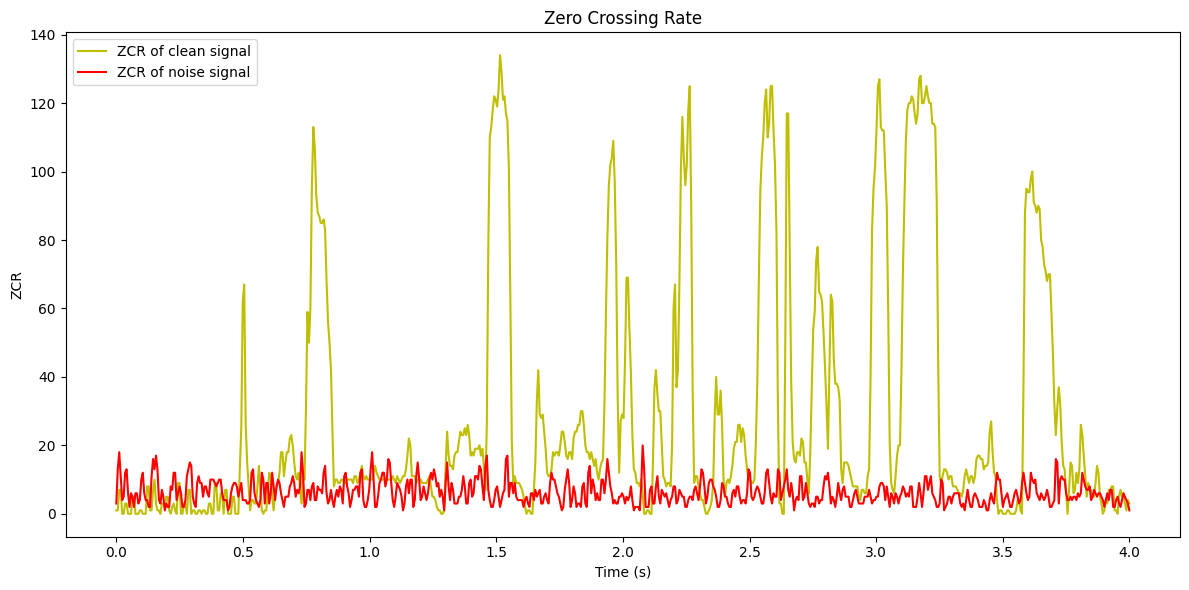

In [ ]:
# Convert frame indices to time values
frames = range(len(zcr_signal_clean))
time = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)/2


# Plotting the Zero Crossing Rate (ZCR) for both clean and noise signals over time

plt.figure(figsize = (12,6))
plt.plot(time, zcr_signal_clean * FRAME_LENGTH, color = "y", label = "ZCR of clean signal")
plt.plot(time, zcr_signal_noise * FRAME_LENGTH, color = "r", label = "ZCR of noise signal")
plt.title("Zero Crossing Rate")
plt.xlabel("Time (s)")
plt.ylabel("ZCR")
plt.legend(loc = "upper left")

#plt.savefig(os.path.join(save_path, "ZCR energy.png"))
plt.tight_layout()
plt.show()

In [ ]:
def plot_magnitude_spectrum(magnitude_spectrum, sr, title, frequency_ration = 1):
  """
    Plot the magnitude spectrum.

    Parameters:
    - magnitude_spectrum (numpy.ndarray): The magnitude spectrum to be plotted.
    - sr (int): The sampling rate of the audio signal.
    - title (str): The title of the plot.
    - frequency_ratio (float, optional): The ratio of frequencies to be plotted. Defaults to 1.

    Returns:
    - None
  """
  plt.figure(figsize = (12 , 4))

  frequency = np.linspace(0, sr, len(magnitude_spectrum))
  num_frequency_bins = int(len(frequency) * frequency_ration)
  plt.plot(frequency[0:num_frequency_bins], magnitude_spectrum[0:num_frequency_bins])
  plt.title(title)
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")

  #plt.savefig(os.path.join(save_path, title))
  plt.tight_layout()
  plt.show()

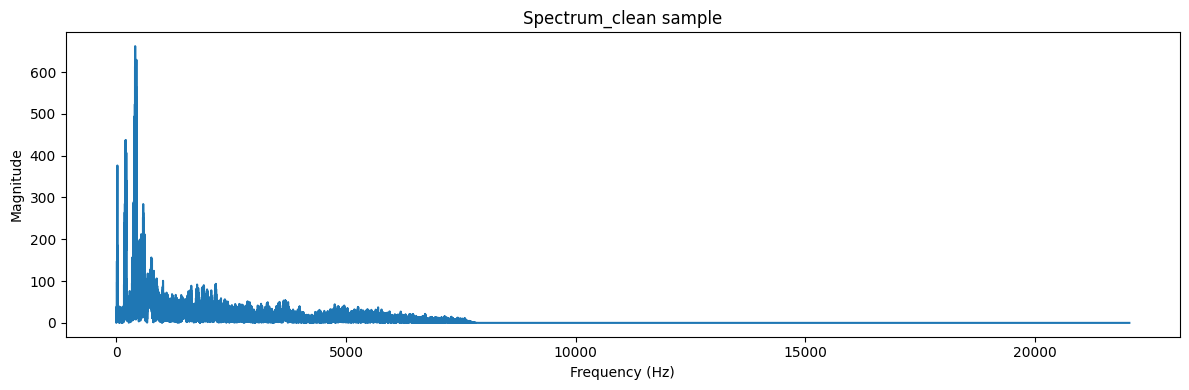

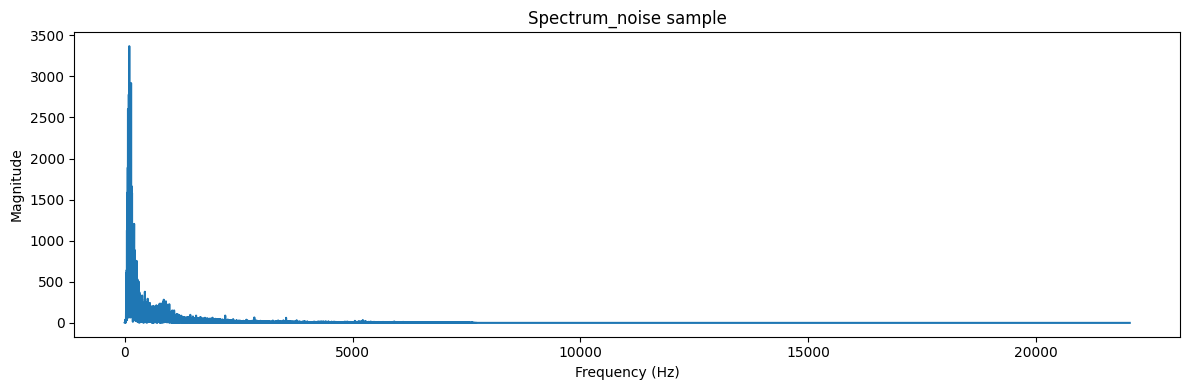

In [ ]:
# compute the fast fourier transform of both signals
ft_signal_clean = np.fft.fft(signal_clean)
ft_signal_noise = np.fft.fft(signal_noise)

# extract magnitude spectrum of the signals
magnitude_spectrum_clean = np.abs(ft_signal_clean)
magnitude_spectrum_noise = np.abs(ft_signal_noise)

# Plot the magnitude spectrum of the signals
plot_magnitude_spectrum(magnitude_spectrum_clean, sr, "Spectrum_clean sample", 0.5)
plot_magnitude_spectrum(magnitude_spectrum_noise, sr, "Spectrum_noise sample", 0.5)

In [ ]:
def plot_spectrogram(spectrogram, sr, hop_length, y_axis = "log", title = "Log Spactrogram"):
  """
    Plot a spectrogram.

    Parameters:
    - spectrogram (numpy.ndarray): The input spectrogram to be plotted.
    - sr (int): The sampling rate of the audio signal.
    - hop_length (int): The number of samples between successive frames.
    - y_axis (str, optional): The scale of the frequency axis. Defaults to "log".
    - title (str, optional): The title of the plot. Defaults to "Spectrogram".

    Returns:
    - None
  """

  plt.figure(figsize = (17,6))
  librosa.display.specshow(spectrogram, sr = sr, hop_length = hop_length, x_axis = "time", y_axis = y_axis,)
  plt.title(title)
  plt.ylabel("Frequency (Hz)")
  plt.xlabel("Time (s)")
  colorbar = plt.colorbar()
  colorbar.set_label('Intensity')

  #plt.savefig(os.path.join(save_path, title))
  plt.show()

In [ ]:
# extract short time fourier transform (STFT) of both signals
stft_signal_clean = librosa.stft(signal_clean, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)
stft_signal_noise = librosa.stft(signal_noise, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)

# extract spectrogram of the signals
spectrogram_clean = librosa.power_to_db(np.abs(stft_signal_clean) ** 2)
spectrogram_noise = librosa.power_to_db(np.abs(stft_signal_noise) ** 2)

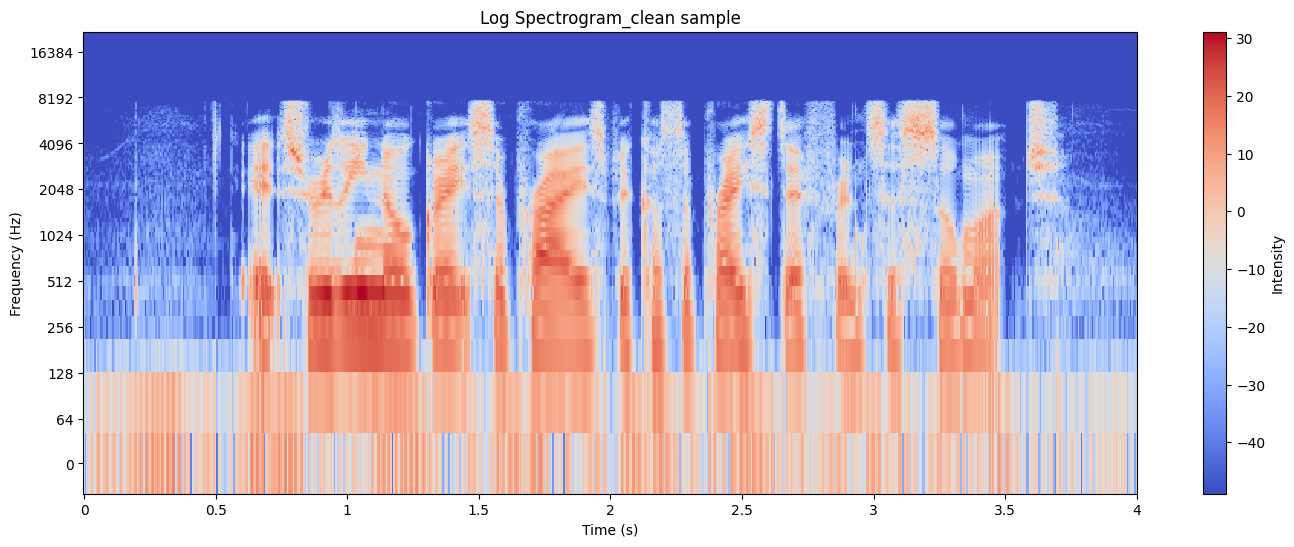

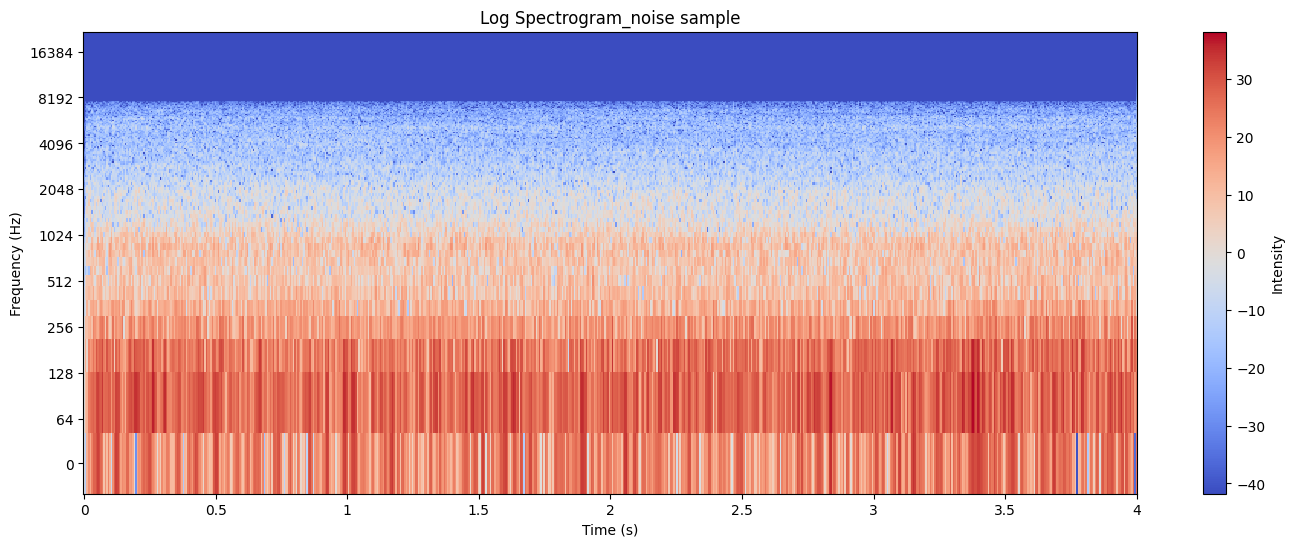

In [ ]:
# Plot the log spectrograms of the signals

plot_spectrogram(spectrogram_clean, sr, HOP_LENGTH, "log", title="Log Spectrogram_clean sample")
plot_spectrogram(spectrogram_noise, sr, HOP_LENGTH, "log", title="Log Spectrogram_noise sample")

In [16]:
def plot_mel_spectrogram(mel_spectrogram, sr, title = "Log Mel Spectrogram"):
  """
    Plots a logarithmic Mel spectrogram.

    Parameters:
        mel_spectrogram (numpy.ndarray): The logarithmic Mel spectrogram to be plotted.
        sr (int): The sampling rate of the audio.
        title (str, optional): Title of the plot. Defaults to "Log Mel Spectrogram".

    Returns:
        None
  """

  plt.figure(figsize = (17,6))
  librosa.display.specshow(mel_spectrogram, sr = sr, x_axis = "time", y_axis = "mel")
  plt.title(title)
  plt.xlabel("Time (s)")
  plt.ylabel("Mel Frequency")
  colorbar = plt.colorbar()
  colorbar.set_label('Magnitude')

  #plt.savefig(os.path.join(save_path, title))
  plt.show()

In [ ]:
# Extract Mel Spectrogram of the signals

mel_spectrogram_clean = librosa.feature.melspectrogram(y = signal_clean, sr = sr, n_fft = FRAME_LENGTH, hop_length = HOP_LENGTH, n_mels = 90)# n_mels needs to be modified for our task by sevral tests
mel_spectrogram_noise = librosa.feature.melspectrogram(y = signal_noise, sr = sr, n_fft = FRAME_LENGTH, hop_length = HOP_LENGTH, n_mels = 90)

mel_spectrogram_clean.shape # (number of mal bands, number of frames)

(90, 690)

In [ ]:
# Change the mal_spectrograms scale to logarithmic

log_mel_spectrogram_clean = librosa.power_to_db(mel_spectrogram_clean)
log_mel_spectrogram_noise = librosa.power_to_db(mel_spectrogram_noise)

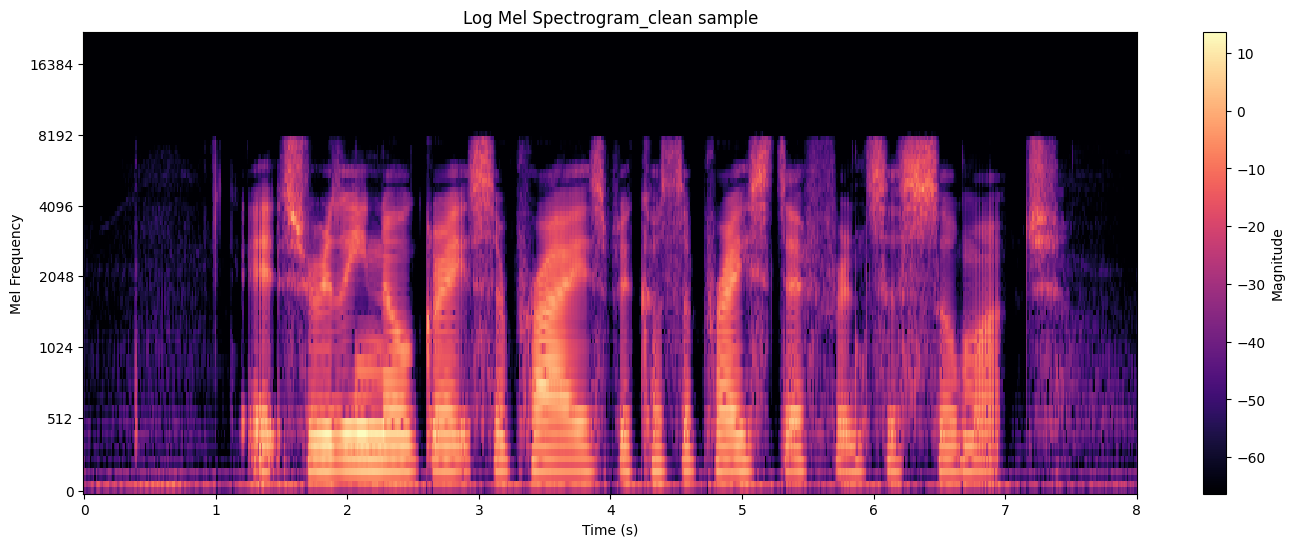

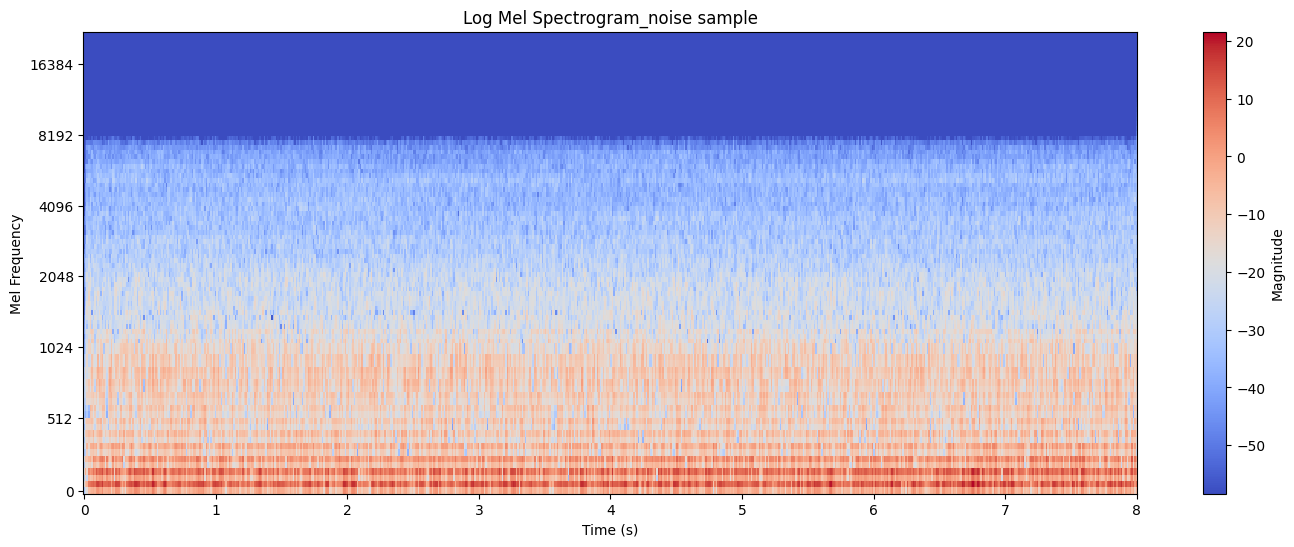

In [ ]:
# Plot the log mel spectrograms of the signals

plot_mel_spectrogram(log_mel_spectrogram_clean, sr, title = "Log Mel Spectrogram_clean sample")
plot_mel_spectrogram(log_mel_spectrogram_noise, sr, title = "Log Mel Spectrogram_noise sample")

In [ ]:
def plot_mfccs(mfccs, sr, title):
  """
    Plot Mel-Frequency Cepstral Coefficients (MFCCs) spectrogram.

    Parameters:
    mfccs (numpy.ndarray): MFCCs array of shape (n_mfcc, n_frames).
    sr (int): Sampling rate of the audio signal.
    title (str): Title of the plot.

    Returns:
    None
  """

  plt.figure(figsize = (14,6))
  librosa.display.specshow(mfccs, sr = sr, x_axis = "time")
  plt.title(title)
  colorbar = plt.colorbar(format='%+2.0f dB')
  colorbar.set_label('Magnitude (dB)')

  #plt.savefig(os.path.join(save_path, title))
  plt.show()

In [ ]:
# Extract Mel_Frequency Cepstral Coefficients(MFCCs) of the signals

mfccs_clean = librosa.feature.mfcc(y = signal_clean, sr = sr, n_mfcc = 13)
mfccs_noise = librosa.feature.mfcc(y = signal_noise, sr = sr, n_mfcc = 13)

mfccs_clean.shape

(13, 345)

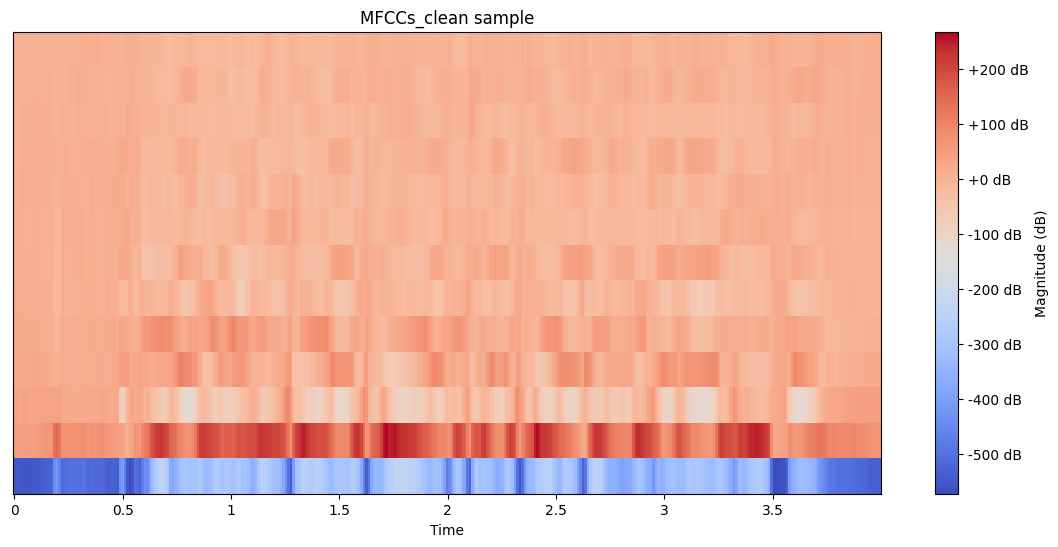

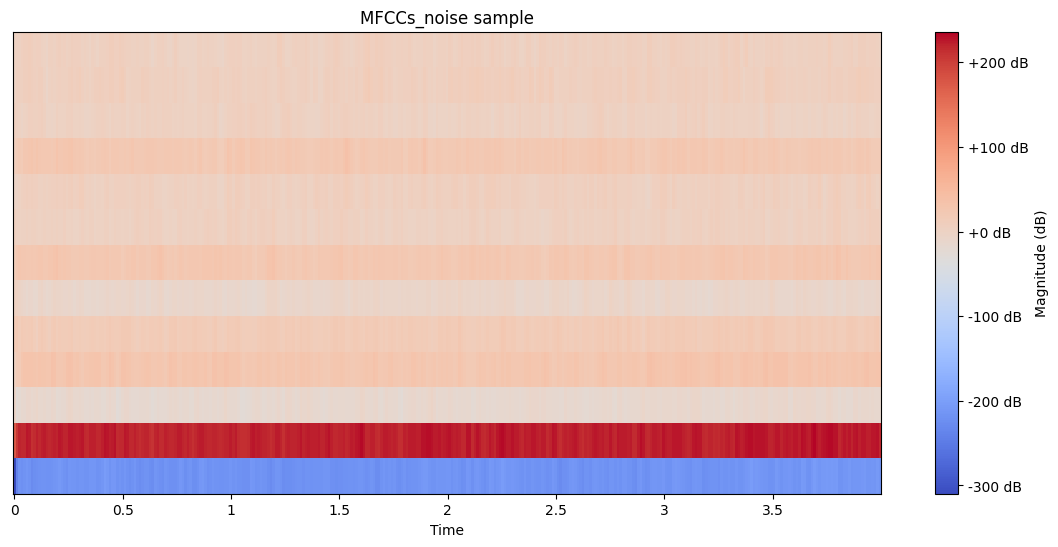

In [ ]:
# Plot the MFCCs of the signals

plot_mfccs(mfccs_clean, sr, title = "MFCCs_clean sample")
plot_mfccs(mfccs_noise, sr, title = "MFCCs_noise sample")

In [ ]:
# Calculate delta and delta2 MFCCs (first and second derivative of the MFCCs) of the signals

delta_mfccs_clean = librosa.feature.delta(mfccs_clean)
delta_mfccs_noise = librosa.feature.delta(mfccs_noise)

delta2_mfccs_clean = librosa.feature.delta(mfccs_clean, order = 2)
delta2_mfccs_noise = librosa.feature.delta(mfccs_noise, order = 2)

delta_mfccs_clean.shape

(13, 345)

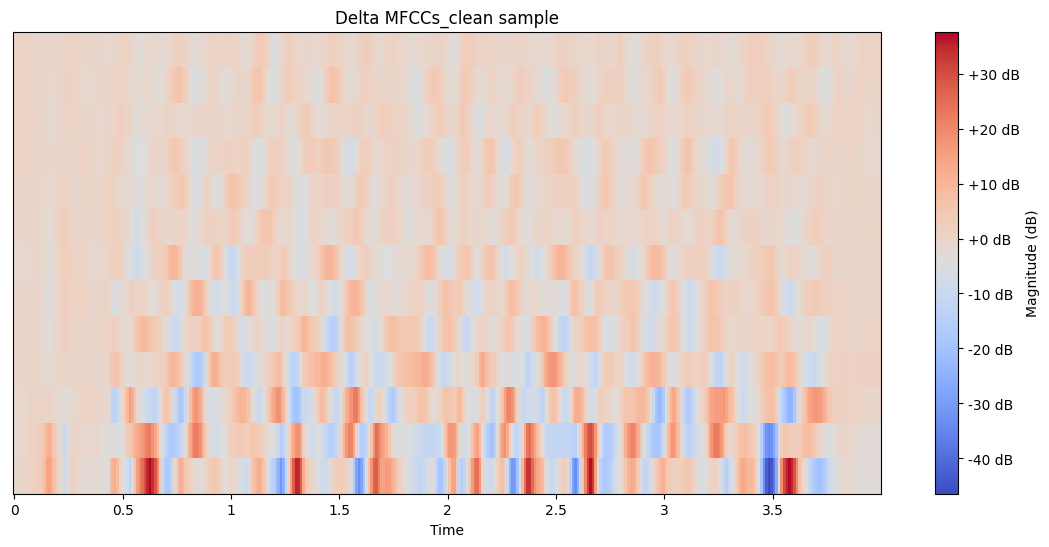

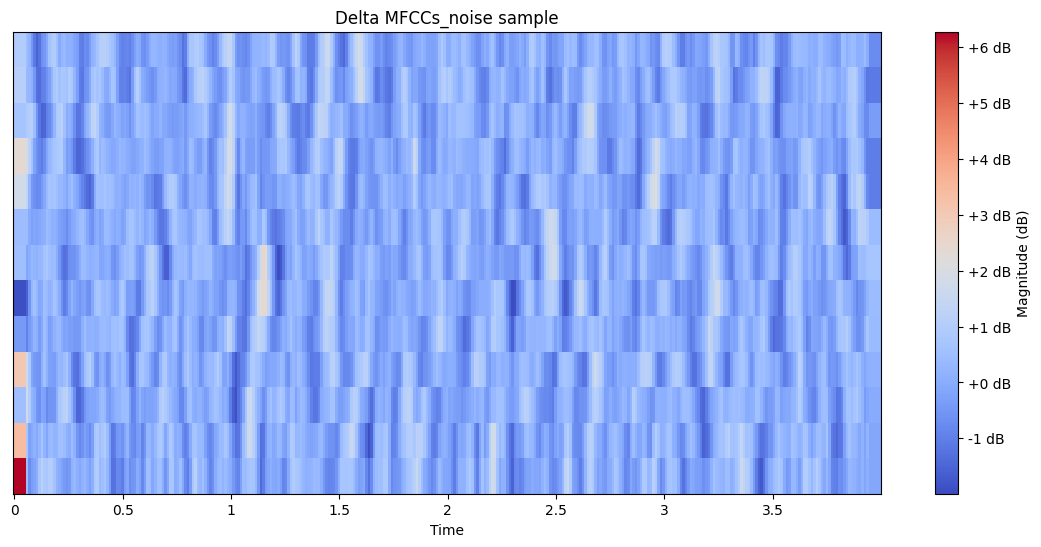

In [ ]:
# Plot the delta MFCCs of the signals

plot_mfccs(delta_mfccs_clean, sr, title = "Delta MFCCs_clean sample")
plot_mfccs(delta_mfccs_noise, sr, title = "Delta MFCCs_noise sample")

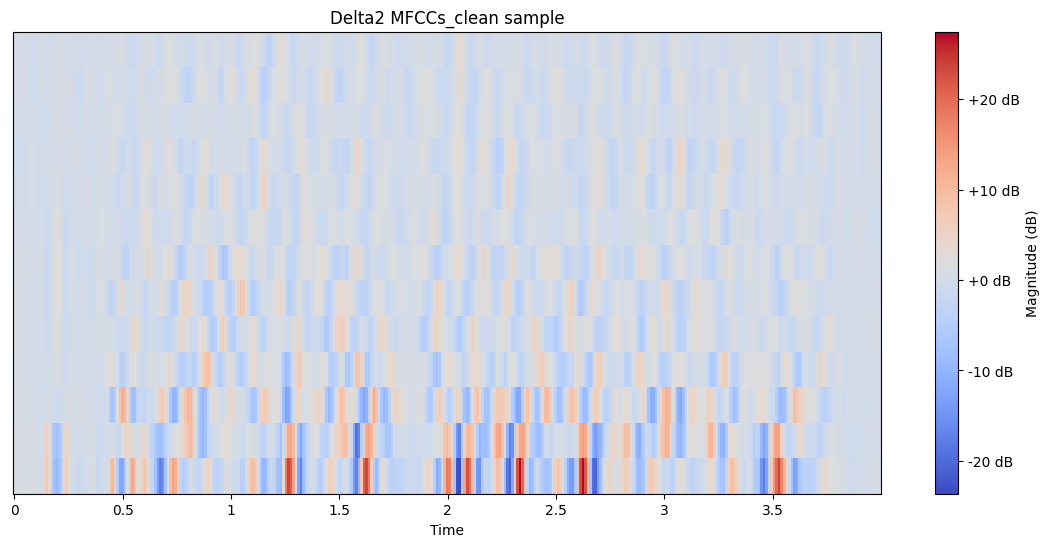

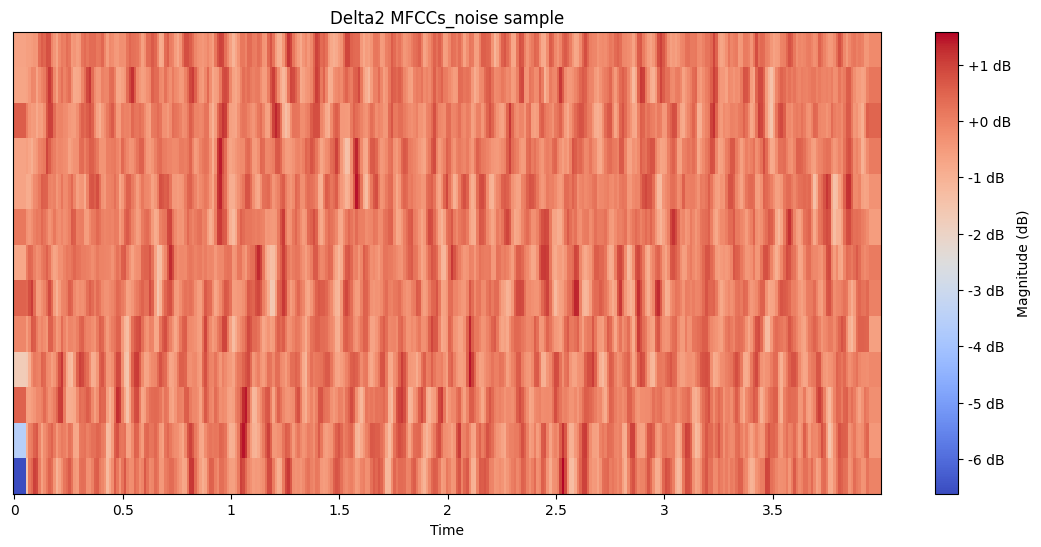

In [ ]:
# Plot the delta2 MFCCs of the signals

plot_mfccs(delta2_mfccs_clean, sr, title = "Delta2 MFCCs_clean sample")
plot_mfccs(delta2_mfccs_noise, sr, title = "Delta2 MFCCs_noise sample")

In [ ]:
# Extract Spectral Centroid of the signals

sc_clean = librosa.feature.spectral_centroid(y = signal_clean, sr = sr, n_fft = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
sc_noise = librosa.feature.spectral_centroid(y = signal_noise, sr = sr, n_fft = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

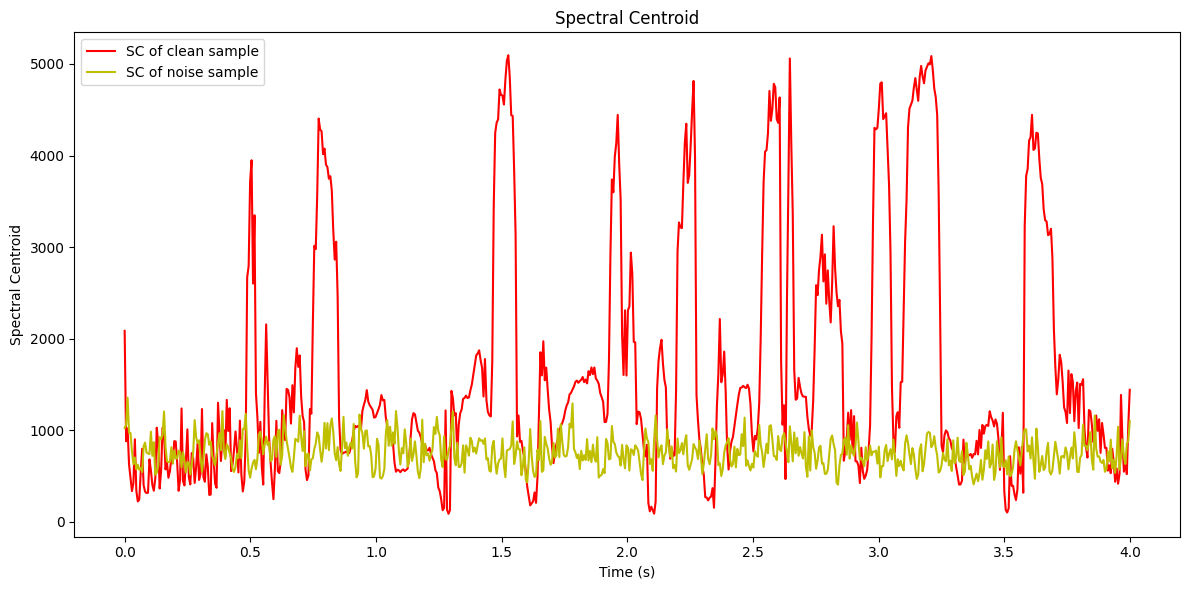

In [ ]:
# Convert frame indices to time values
frames = range(len(sc_clean))
time = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)/2


# Plot the spectral centroids

plt.figure(figsize = (12 , 6))
plt.plot(time, sc_clean, color = "r", label = "SC of clean sample")
plt.plot(time, sc_noise, color = "y", label = "SC of noise sample")
plt.title("Spectral Centroid")
plt.xlabel("Time (s)")
plt.ylabel("Spectral Centroid")
plt.legend(loc = "upper left")
plt.tight_layout()
#plt.savefig(os.path.join(save_path, "Spectral Centroid"))
plt.show()

In [ ]:
# Calculate Bandwidth

bw_clean = librosa.feature.spectral_bandwidth(y = signal_clean, sr = sr, n_fft = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
bw_noise = librosa.feature.spectral_bandwidth(y = signal_noise, sr = sr, n_fft = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

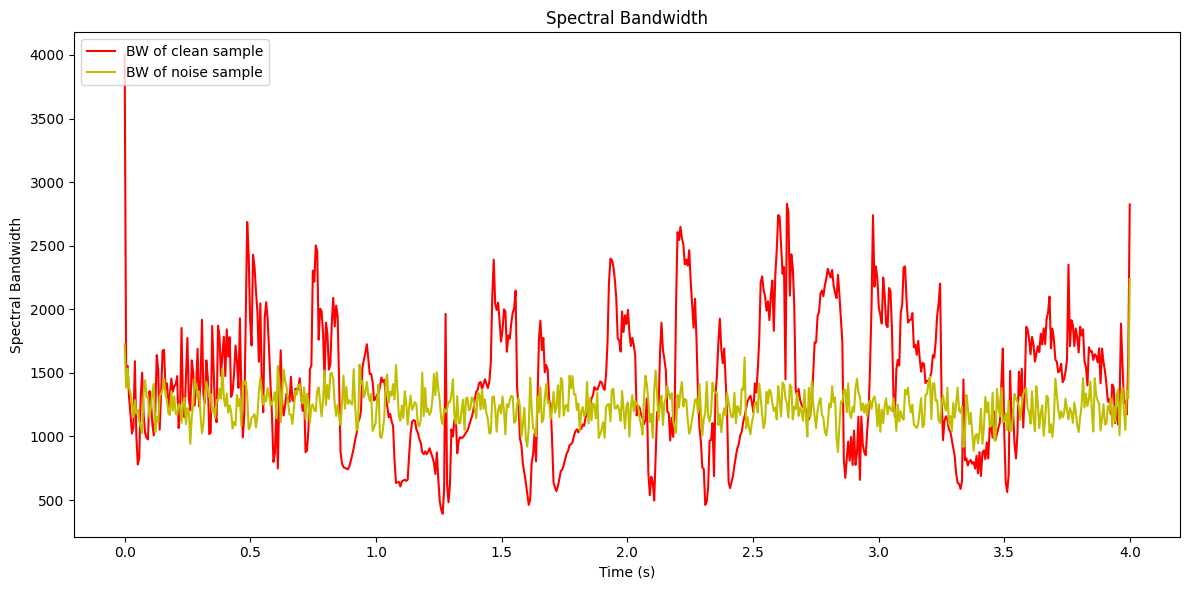

In [ ]:
# Convert frame indices to time values
frames = range(len(sc_clean))
time = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)/2


# Plot the spectral centroids

plt.figure(figsize = (12 , 6))
plt.plot(time, bw_clean, color = "r", label = "BW of clean sample")
plt.plot(time, bw_noise, color = "y", label = "BW of noise sample")
plt.title("Spectral Bandwidth")
plt.xlabel("Time (s)")
plt.ylabel("Spectral Bandwidth")
plt.legend(loc = "upper left")
plt.tight_layout()
#plt.savefig(os.path.join(save_path, "Spectral Bandwidth"))
plt.show()

In [ ]:
def calculate_split_frequency_bin(spectrogram, sr, split_frequency = 2000):
  """
    Calculate the frequency bin corresponding to a given split frequency in a spectrogram.

    Parameters:
    - spectrogram (numpy.ndarray): The spectrogram for which the split frequency bin is calculated.
    - sr (int): The sampling rate of the audio signal.
    - split_frequency (int, optional): The split frequency in Hertz. Defaults to 2000.

    Returns:
    - int: The frequency bin index corresponding to the split frequency.
  """
  frequency_range = sr / 2
  frequency_delta_per_bin = frequency_range / spectrogram.shape[0]
  split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)

  return int(split_frequency_bin)

In [ ]:
def calculate_band_energy_ratio(spectrogram, sr, split_frequency = 2000):
  """
    Calculate the Band Energy Ratio (BER) for a given spectrogram and split frequency.

    The Band Energy Ratio is the ratio of the total energy in the lower frequency range
    (up to the split frequency) to the total energy in the higher frequency range.

    Parameters:
    - spectrogram (numpy.ndarray): The spectrogram for which the BER is calculated.
    - sr (int): The sampling rate of the audio signal.
    - split_frequency (int, optional): The split frequency in Hertz. Defaults to 2000.

    Returns:
    - numpy.ndarray: Array containing the Band Energy Ratio for each frame in the spectrogram.
  """

  split_frequency_bin = calculate_split_frequency_bin(spectrogram, sr, split_frequency)

  # Move to the power spectrogram
  power_spec = np.abs(spectrogram) ** 2
  power_spec = power_spec.T

  band_energy_ratio = []

  # Calculate BER for each frame
  for frequencies_in_frame in power_spec:
    sum_power_low_freq = np.sum(frequencies_in_frame[:split_frequency_bin])
    sum_power_high_freq = np.sum(frequencies_in_frame[split_frequency_bin:])
    ber_current_frame = sum_power_low_freq / sum_power_high_freq
    band_energy_ratio.append(ber_current_frame)

  return np.array(band_energy_ratio)

In [ ]:
# Extract Band Energy Ratio (BER)

ber_clean = calculate_band_energy_ratio(stft_signal_clean, sr, split_frequency=2000)
ber_noise = calculate_band_energy_ratio(stft_signal_noise, sr, split_frequency=2000)

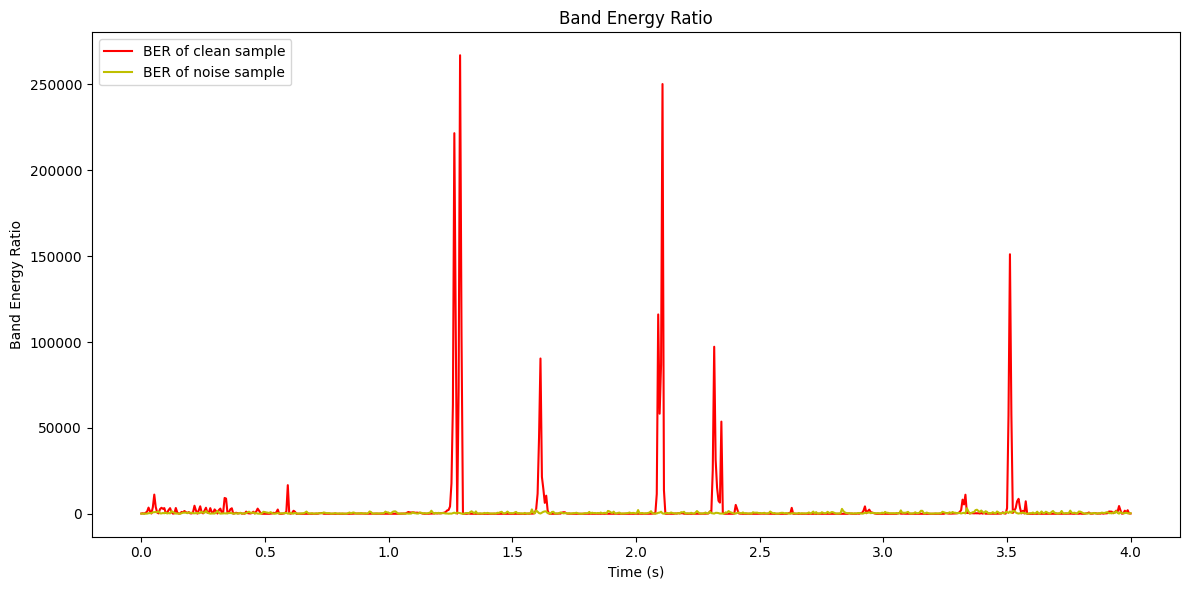

In [ ]:
# Convert frame indices to time values
frames = range(len(ber_clean))
time = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)/2


# Plot the spectral centroids

plt.figure(figsize = (12 , 6))
plt.plot(time, ber_clean, color = "r", label = "BER of clean sample")
plt.plot(time, ber_noise, color = "y", label = "BER of noise sample")
plt.title("Band Energy Ratio")
plt.xlabel("Time (s)")
plt.ylabel("Band Energy Ratio")
plt.legend(loc = "upper left")
plt.tight_layout()
#plt.savefig(os.path.join(save_path, "Band Energy Ratio"))
plt.show()

In [25]:
clean_train_data_path = "/content/drive/MyDrive/White Noise project/Dataset/clean_train"
noise_train_data_path = "/content/drive/MyDrive/White Noise project/Dataset/noise_train"
save_path = "/content/drive/MyDrive/White Noise project/Dataset/dataset_overview"

VOICE_LENGTH = 4
FRAME_LENGTH = 1024
HOP_LENGTH = 512

In [34]:
def data_generator(clean_train_data_path, noise_train_data_path, voice_length, clean_amplitude = 0.8, noise_amplitude = 0.2):
  """
    Generate mixed audio signals combining clean voice and noise.

    Args:
    clean_train_data_path (str): Path to directory containing clean voice audio files.
    noise_train_data_path (str): Path to directory containing noise audio files.
    voice_length (int): Length of the output audio signal in seconds.
    clean_amplitude (float, optional): Amplitude scaling factor for clean voice signal (default is 0.8).
    noise_amplitude (float, optional): Amplitude scaling factor for noise signal (default is 0.2).

    Returns:
    tuple: A tuple containing two log Mel spectrograms, one for the clean voice signal and one for the mixed signal.
    log_mel_spec_clean (numpy.ndarray): Log Mel spectrogram of the clean voice signal.
    log_mel_spec_mixed (numpy.ndarray): Log Mel spectrogram of the mixed signal.
  """
  clean_voice = os.path.join(clean_train_data_path, random.choice(os.listdir(clean_train_data_path)))
  noise_voice = os.path.join(noise_train_data_path, random.choice(os.listdir(noise_train_data_path)))

  clean_signal, sr = librosa.load(clean_voice, sr=44100)
  noise_signal, _ = librosa.load(noise_voice, sr=44100)

  num_needed_samples = voice_length * sr

  if len(clean_signal) < num_needed_samples:
    clean_signal = np.concatenate([clean_signal, np.zeros(num_needed_samples - len(clean_signal))])
  else:
    clean_signal = clean_signal[:num_needed_samples]

  if len(noise_signal) < num_needed_samples:
    noise_signal = np.concatenate([noise_signal, np.zeros(num_needed_samples - len(noise_signal))])
  else:
    noise_signal = noise_signal[:num_needed_samples]

  mixed_signal = np.array((clean_amplitude * clean_signal[:VOICE_LENGTH*sr]) + (noise_amplitude * noise_signal[:VOICE_LENGTH*sr]))

  # Extract mel spectrograms
  mel_spec_clean = librosa.feature.melspectrogram(y=clean_signal, sr=sr, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)
  log_mel_spec_clean = librosa.power_to_db(mel_spec_clean)

  mel_spec_mixed = librosa.feature.melspectrogram(y=mixed_signal, sr=sr, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)
  log_mel_spec_mixed = librosa.power_to_db(mel_spec_mixed)

  return log_mel_spec_clean, log_mel_spec_mixed

In [35]:
# Create a test of mixed voice

log_mel_spec_clean, log_mel_spec_mixed = data_generator(clean_train_data_path, noise_train_data_path, voice_length=VOICE_LENGTH)
# test_mixed_voice_path = os.path.join(save_path, "mixed.wav")
# sf.write(test_mixed_voice_path, signal, 44100)
# ipd.Audio(test_mixed_voice_path)

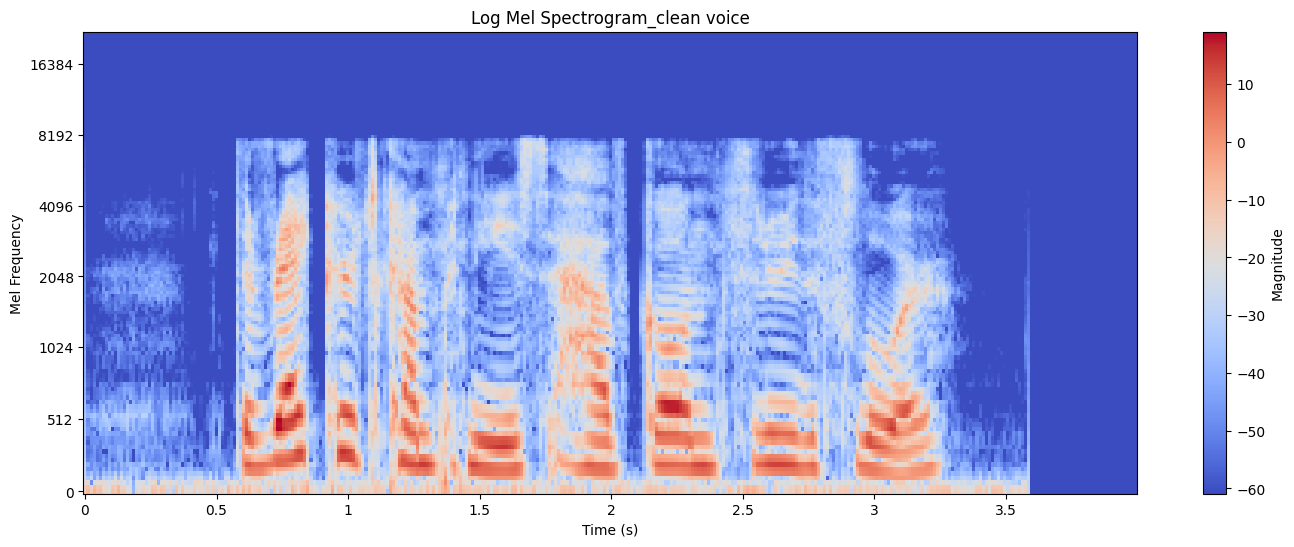

In [36]:
plot_mel_spectrogram(log_mel_spec_clean, sr=44100, title = "Log Mel Spectrogram_clean voice")

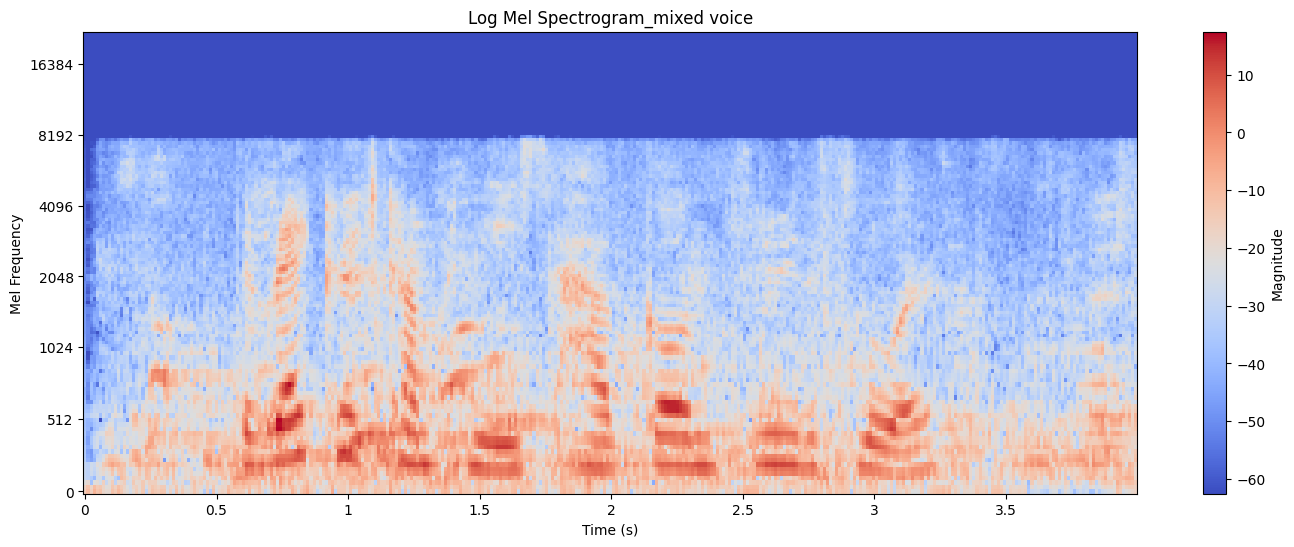

In [37]:
plot_mel_spectrogram(log_mel_spec_mixed, sr=44100, title = "Log Mel Spectrogram_mixed voice")